In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [ ]:
# !pip3 install matplotlib geopandas shapely

Load Data using geopandas

In [7]:
df = pd.read_csv('../data/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv', parse_dates=['collection_week'])
df.head()

/var/folders/4n/fnm27kds4tsbfbt5m1y08tp80000gq/T/ipykernel_45832/1840837538.py:1: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv', parse_dates=['collection_week'])


,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_pediatric_covid_confirmed_7_day_coverage,previous_day_admission_adult_covid_suspected_7_day_coverage,previous_day_admission_pediatric_covid_suspected_7_day_coverage,previous_week_personnel_covid_vaccinated_doses_administered_7_day,total_personnel_covid_vaccinated_doses_none_7_day,total_personnel_covid_vaccinated_doses_one_7_day,total_personnel_covid_vaccinated_doses_all_7_day,previous_week_patients_covid_vaccinated_doses_one_7_day,previous_week_patients_covid_vaccinated_doses_all_7_day,is_corrected
0,28TA03,2022-02-18,NE,28TA03,MADONNA REHABILITATION SPECIALTY HOSPITAL OMAHA,17500 BURKE STREET,OMAHA,68118.0,Long Term,31055.0,...,1,1,1,21.0,78.0,391.0,384.0,0.0,0.0,False
1,301300,2022-02-18,NH,301300,UPPER CONNECTICUT VALLEY HOSPITAL,181 CORLISS LANE,COLEBROOK,3576.0,Critical Access Hospitals,33007.0,...,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,False
2,332006,2022-02-18,NY,332006,CALVARY HOSPITAL INC,1740 - 70 EASTCHESTER R0AD,BRONX,10461.0,Long Term,36005.0,...,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,False
3,362031,2022-02-18,OH,362031,SELECT SPECIALTY HOSPITAL SOUTHEAST OHIO,"200 TAMARACK ROAD, 2ND FLOOR",NEWARK,43055.0,Long Term,39089.0,...,7,7,7,0.0,NaN,NaN,NaN,NaN,NaN,False
4,670010,2022-02-18,TX,670010,MAYHILL HOSPITAL,2809 SOUTH MAYHILL ROAD,DENTON,76208.0,Short Term,48121.0,...,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,False


In [8]:
from shapely import wkt
df['geocoded_hospital_address'] = gpd.GeoSeries.from_wkt(df['geocoded_hospital_address'])

In [9]:
df_ny = df[df.state=='NY']
len(df_ny), len(df)

(13408, 409797)

In [10]:
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df_ny, crs=crs, geometry=df_ny.geocoded_hospital_address)

/usr/local/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [11]:
len(geo_df.city.unique())

114

In [14]:
street_map = gpd.read_file('../data/NYS_Civil_Boundaries.shp.zip',)
print(street_map)

          NAME MUNI_TYPE  MUNITYCODE       COUNTY GNIS_ID   FIPS_CODE    SWIS  \
0        Adams      town           2    Jefferson  978655  3604500210  222000   
1      Addison      town           2      Steuben  978656  3610100287  462000   
2        Afton      town           2     Chenango  978657  3601700353  082000   
3      Alabama      town           2      Genesee  978658  3603700474  182000   
4       Albany      city           1       Albany  978659  3600101000  010100   
..         ...       ...         ...          ...     ...         ...     ...   
990      Yates      town           2      Orleans  979659  3607383448  343800   
991    Yonkers      city           1  Westchester  979660  3611984000  551800   
992       York      town           2   Livingston  979661  3605184022  245200   
993  Yorkshire      town           2  Cattaraugus  979662  3600984055  048400   
994   Yorktown      town           2  Westchester  979663  3611984077  555400   

     POP1990  POP2000  POP2

/usr/local/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

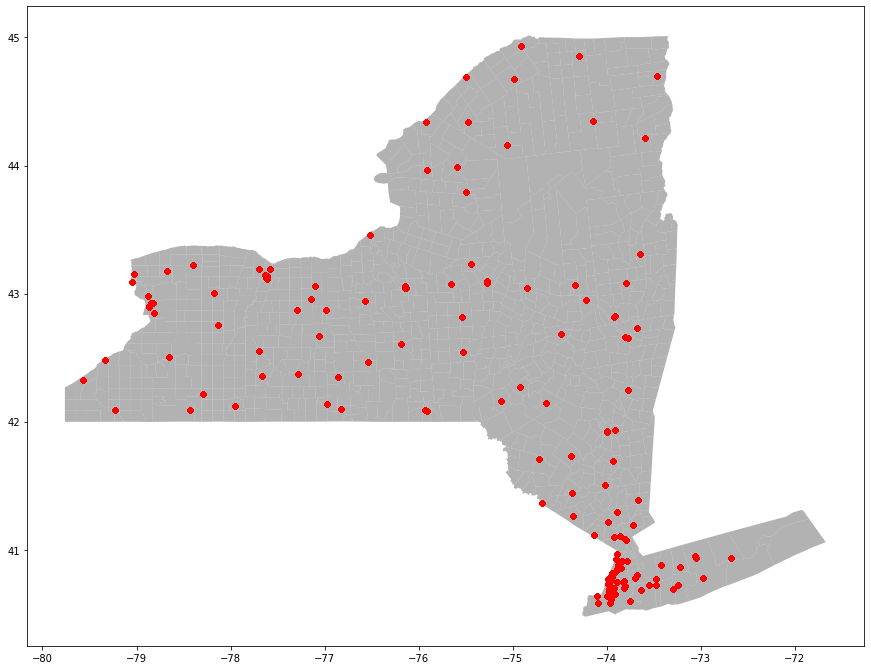

In [135]:
fig,ax = plt.subplots(figsize= (15,15))
x = street_map.to_crs(crs)
x.plot(ax=ax, alpha=0.6, color='grey')
geo_df.plot(ax = ax, markersize=20, color='red', marker="o")

In [133]:
len(street_map[street_map.MUNI_TYPE=='city'])

62

In [142]:
street_map.head()

,NAME,MUNI_TYPE,MUNITYCODE,COUNTY,GNIS_ID,FIPS_CODE,SWIS,POP1990,POP2000,POP2010,POP2020,DOS_LL,DOSLL_DATE,MAP_SYMBOL,CALC_SQ_MI,DATEMOD,Shape_Leng,Shape_Area,geometry
0,Adams,town,2,Jefferson,978655,3604500210,222000,4977,4782,5143,4973,None,None,T,42.361757,2018-11-06,41971.838963,1.097164e+08,"POLYGON ((419711.937 4860894.762, 420725.148 4..."
1,Addison,town,2,Steuben,978656,3610100287,462000,2645,2640,2595,2397,None,None,T,25.777686,2018-03-01,33582.894334,6.676390e+07,"POLYGON ((311738.502 4672651.742, 312215.800 4..."
2,Afton,town,2,Chenango,978657,3601700353,082000,2972,2977,2851,2769,None,None,T,46.677247,2017-09-01,56181.056904,1.208935e+08,"POLYGON ((457510.038 4679307.408, 457514.525 4..."
3,Alabama,town,2,Genesee,978658,3603700474,182000,1998,1881,1869,1602,None,None,T,52.236298,2018-02-12,48055.772466,1.352914e+08,"POLYGON ((223125.570 4780997.861, 224223.622 4..."
4,Albany,city,1,Albany,978659,3600101000,010100,101082,95658,97856,99224,None,None,1,21.990002,2017-11-10,52588.062435,5.695384e+07,"POLYGON ((594045.717 4729421.064, 594243.246 4..."


/usr/local/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

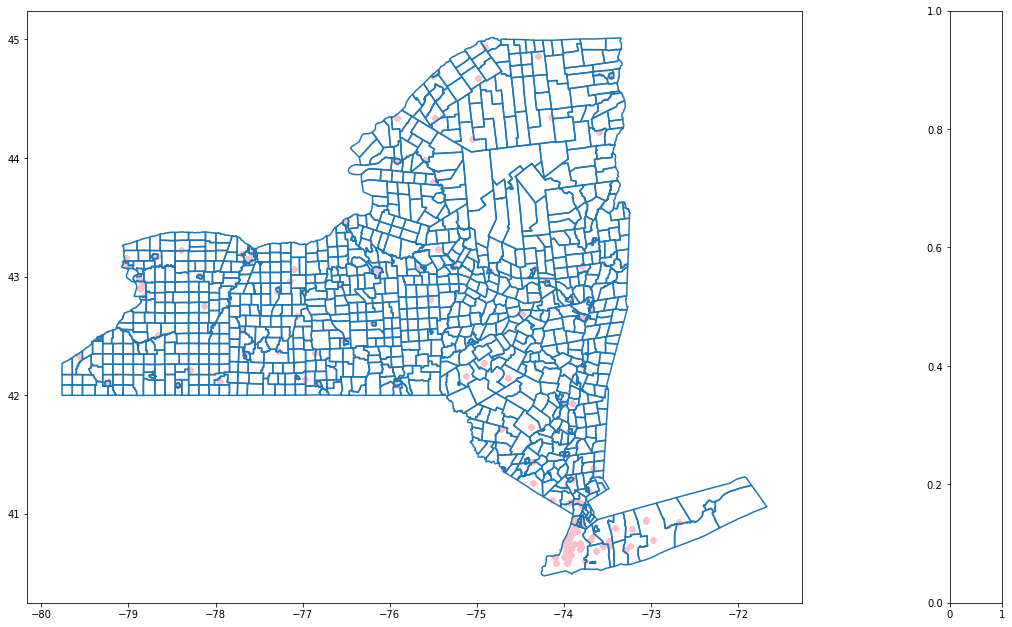

In [143]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

subset = street_map.copy()
subset['pop_density'] = street_map['POP2020']/street_map['CALC_SQ_MI']
fig, ax = plt.subplots(figsize=(20, 18))
x = subset.to_crs(crs)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# x.plot(ax=ax,
#        column='pop_density',
#        legend=True,
#        legend_kwds={'label': "Population by County",
#                     'orientation': "horizontal"},
#        cax=cax,
#        cmap='OrRd')
x.boundary.plot(ax=ax)
geo_df.plot(ax=ax, markersize=20, color='pink', marker="o")


In [ ]:
#extract unique hospotals and it's point
hospitals = geo_df['hospital_pk','hospital_name','address','city','zip']
len(geo_df.hospital_pk.unique())

In [ ]:
hsp = geo_df.drop_duplicates(subset=['hospital_pk'])
print('hsp without address',hsp.geocoded_hospital_address.isna().sum())
hsp[hsp.geocoded_hospital_address.isna()][['hospital_pk','hospital_name','address','city','zip','geocoded_hospital_address']]

hsp without address 11


,hospital_pk,hospital_name,address,city,zip,geocoded_hospital_address
2,332006,CALVARY HOSPITAL INC,1740 - 70 EASTCHESTER R0AD,BRONX,10461.0,None
434,330085,AURELIA OSBORN FOX MEMORIAL HOSPITAL,ONE NORTON AVENUE,ONEONTA,13820.0,None
435,330198,MOUNT SINAI SOUTH NASSAU,ONE HEALTHY WAY,OCEANSIDE,11572.0,None
1986,330024,MOUNT SINAI HOSPITAL,ONE GUSTAVE L LEVY PLACE,NEW YORK,10029.0,None
4722,330195,LONG ISLAND JEWISH MEDICAL CENTER,270 - 05 76TH AVENUE,NEW HYDE PARK,11040.0,None
4878,330136,MARY IMOGENE BASSETT HOSPITAL,ONE ATWELL ROAD,COOPERSTOWN,13326.0,None
5207,330393,STONY BROOK UNIVERSITY HOSPITAL,HEALTH SCIENCES CENTER SUNY,STONY BROOK,11794.0,None
5432,331303,GARNET HEALTH MEDICAL CENTER-CATSKILLS(GMHERMANN),8081 STATE ROUTE 97,CALLICOON,12723.0,None
7592,330304,WHITE PLAINS HOSPITAL CENTER,41 EAST POST R0AD,WHITE PLAINS,10601.0,None
8360,330385,NORTH CENTRAL BRONX HOSPITAL,3424 KOSSUTH AVENUE & 210TH STREET,BRONX,10467.0,None


In [159]:
a = hsp[hsp.geocoded_hospital_address.isna()].hospital_pk.values
pt = hsp[~hsp.hospital_pk.isin(a)]
# p1 = pt[pt.hospital_pk == '330409'].geocoded_hospital_address

subset = street_map.to_crs(crs)
mapping = []
for id1,row in subset.iterrows():
    count = 0
    for id2,p in pt.iterrows():
        p1 = p['geocoded_hospital_address']
        if p1.within(row['geometry']):
            count+=1
    mapping.append(count)

street_map_hsp = street_map.copy()
street_map_hsp['no_of_hosp'] = mapping
street_map_hsp.head()

/usr/local/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,NAME,MUNI_TYPE,MUNITYCODE,COUNTY,GNIS_ID,FIPS_CODE,SWIS,POP1990,POP2000,POP2010,POP2020,DOS_LL,DOSLL_DATE,MAP_SYMBOL,CALC_SQ_MI,DATEMOD,Shape_Leng,Shape_Area,geometry,no_of_hosp
0,Adams,town,2,Jefferson,978655,3604500210,222000,4977,4782,5143,4973,None,None,T,42.361757,2018-11-06,41971.838963,1.097164e+08,"POLYGON ((419711.937 4860894.762, 420725.148 4...",0
1,Addison,town,2,Steuben,978656,3610100287,462000,2645,2640,2595,2397,None,None,T,25.777686,2018-03-01,33582.894334,6.676390e+07,"POLYGON ((311738.502 4672651.742, 312215.800 4...",0
2,Afton,town,2,Chenango,978657,3601700353,082000,2972,2977,2851,2769,None,None,T,46.677247,2017-09-01,56181.056904,1.208935e+08,"POLYGON ((457510.038 4679307.408, 457514.525 4...",0
3,Alabama,town,2,Genesee,978658,3603700474,182000,1998,1881,1869,1602,None,None,T,52.236298,2018-02-12,48055.772466,1.352914e+08,"POLYGON ((223125.570 4780997.861, 224223.622 4...",0
4,Albany,city,1,Albany,978659,3600101000,010100,101082,95658,97856,99224,None,None,1,21.990002,2017-11-10,52588.062435,5.695384e+07,"POLYGON ((594045.717 4729421.064, 594243.246 4...",2


In [162]:
street_map_hsp.sort_values(by=['no_of_hosp'], ascending=False).head()

,NAME,MUNI_TYPE,MUNITYCODE,COUNTY,GNIS_ID,FIPS_CODE,SWIS,POP1990,POP2000,POP2010,POP2020,DOS_LL,DOSLL_DATE,MAP_SYMBOL,CALC_SQ_MI,DATEMOD,Shape_Leng,Shape_Area,geometry,no_of_hosp
607,New York,city,1,"New York, Bronx, Kings, Richmond, Queens",2395220,3608151000,650000,7322564,8008278,8175133,8804190,None,None,3,470.316754,2019-10-04,179848.883668,1.218115e+09,"MULTIPOLYGON (((580767.735 4504621.963, 580749...",38
105,Buffalo,city,1,Erie,978764,3602911000,140200,328123,292648,261310,278349,None,None,1,51.848405,2018-05-22,54301.513936,1.342868e+08,"POLYGON ((182674.884 4763560.634, 182702.403 4...",5
764,Rochester,city,1,Monroe,979426,3605563000,261400,231636,219773,210565,211328,None,None,1,36.710901,2017-07-26,108164.216928,9.508080e+07,"MULTIPOLYGON (((284136.069 4777252.933, 284133...",4
873,Syracuse,city,1,Onondaga,979539,3606773000,311500,163860,147306,145170,148620,None,None,1,25.631143,2018-03-23,52343.834140,6.638436e+07,"POLYGON ((405772.895 4770654.500, 405895.115 4...",3
100,Brookhaven,town,2,Suffolk,978758,3610310000,472200,407779,448248,486040,485773,None,None,T,510.405013,None,191062.373254,1.321943e+09,"POLYGON ((679827.476 4536730.175, 679875.070 4...",3


/var/folders/4n/fnm27kds4tsbfbt5m1y08tp80000gq/T/ipykernel_45832/4040084295.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


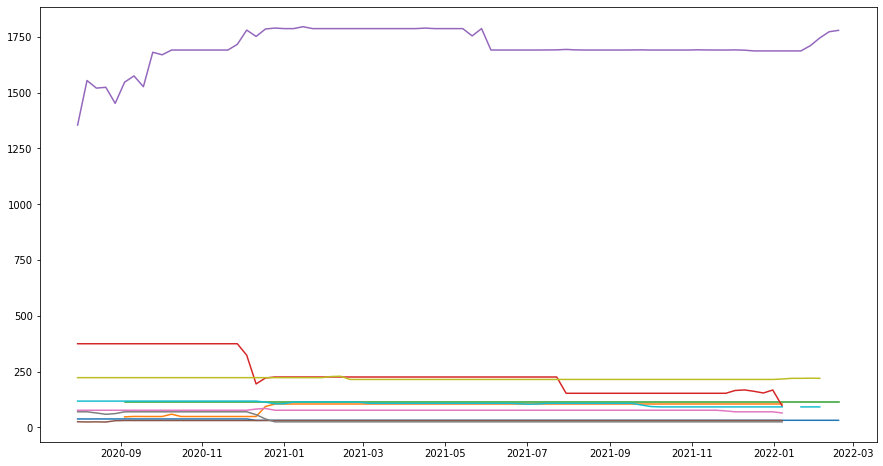

In [176]:
#Analyse beds
# p1.plot(p1.collection_week, p1.total_beds_7_day_avg)
subset = geo_df.sort_values(by=['collection_week'], ascending=True)

fig,ax = plt.subplots(figsize = (15,8))
for pk in list(subset.hospital_pk.unique())[:10]:
    p1 = subset[subset.hospital_pk == pk]
    ax.plot(p1.collection_week, p1.total_beds_7_day_avg)
fig.show();